In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import base64
import pandas_ta as ta

C:\Users\chris\anaconda3\envs\FastApi\lib\site-packages\pandas_ta\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [68]:
data = pd.read_csv('data/apple_stock.csv')
df = data[['Unnamed: 0', 'Adj Close', 'Volume']]
df

,Unnamed: 0,Adj Close,Volume
0,1980-12-12,0.098834,469033600
1,1980-12-15,0.093678,175884800
2,1980-12-16,0.086802,105728000
3,1980-12-17,0.088951,86441600
4,1980-12-18,0.091530,73449600
...,...,...,...
11102,2024-12-27,255.589996,42355300
11103,2024-12-30,252.199997,35557500
11104,2024-12-31,250.419998,39480700
11105,2025-01-02,243.850006,55558000


In [69]:
df.describe()

,Adj Close,Volume
count,11107.000000,1.110700e+04
mean,23.522229,3.154341e+08
std,49.767881,3.348735e+08
min,0.037815,0.000000e+00
25%,0.243402,1.111164e+08
50%,0.446682,2.036944e+08
75%,18.260086,3.960418e+08
max,259.019989,7.421641e+09


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Volume      11107 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 260.4+ KB


In [71]:
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
df[columndate] = pd.to_datetime(df[columndate])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  11107 non-null  datetime64[ns]
 1   Adj Close   11107 non-null  float64       
 2   Volume      11107 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 260.4 KB


C:\Users\chris\AppData\Local\Temp\ipykernel_19292\683975954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columndate] = pd.to_datetime(df[columndate])


In [72]:
df.isnull().sum().sum()

0

In [73]:
df.set_index(columndate, inplace=True)
df

,Adj Close,Volume
Unnamed: 0,,
1980-12-12,0.098834,469033600
1980-12-15,0.093678,175884800
1980-12-16,0.086802,105728000
1980-12-17,0.088951,86441600
1980-12-18,0.091530,73449600
...,...,...
2024-12-27,255.589996,42355300
2024-12-30,252.199997,35557500
2024-12-31,250.419998,39480700


In [74]:
end_date = df.index.max()
start_date_4_years_ago = end_date - pd.DateOffset(years=4)
df4 = df.loc[start_date_4_years_ago:end_date].copy()
df4

,Adj Close,Volume
Unnamed: 0,,
2021-01-04,126.544205,143301900
2021-01-05,128.108780,97664900
2021-01-06,123.796440,155088000
2021-01-07,128.020767,109578200
2021-01-08,129.125763,105158200
...,...,...
2024-12-27,255.589996,42355300
2024-12-30,252.199997,35557500
2024-12-31,250.419998,39480700


In [75]:
numerical_cols = df.select_dtypes(include=np.number).columns
numerical_cols

Index(['Adj Close', 'Volume'], dtype='object')

In [76]:
skew = df4[numerical_cols].skew()
skew

Adj Close    0.712740
Volume       1.686011
dtype: float64

In [77]:
log = skew[skew>1].index.values.tolist()
    #tworzenie slownika z kolumnami.
d = {'log': log, 'date':columndate}
d

{'log': ['Volume'], 'date': 'Unnamed: 0'}

In [78]:
for i in log:
    df4[i] = np.log1p(df4[i])
df4

,Adj Close,Volume
Unnamed: 0,,
2021-01-04,126.544205,18.780464
2021-01-05,128.108780,18.397053
2021-01-06,123.796440,18.859503
2021-01-07,128.020767,18.512149
2021-01-08,129.125763,18.470976
...,...,...
2024-12-27,255.589996,17.561604
2024-12-30,252.199997,17.386662
2024-12-31,250.419998,17.491323


In [79]:
df4.ta.rsi(close='Adj Close', length=14, append=True)
df4.ta.macd(close=df4['Adj Close'], fast=12, slow=26, signal=9, append=True)
df4.ta.ema(close=df4['Adj Close'], length=5, append=True) # np. 10-dniowa EMA
df4.ta.ema(close=df4['Adj Close'], length=10, append=True) 
df4.ta.obv(close=df4['Adj Close'], volume=df4['Volume'], append=True)
df4

,Adj Close,Volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_5,EMA_10,OBV
Unnamed: 0,,,,,,,,,
2021-01-04,126.544205,18.780464,NaN,NaN,NaN,NaN,NaN,NaN,18.780464
2021-01-05,128.108780,18.397053,NaN,NaN,NaN,NaN,NaN,NaN,37.177517
2021-01-06,123.796440,18.859503,NaN,NaN,NaN,NaN,NaN,NaN,18.318014
2021-01-07,128.020767,18.512149,NaN,NaN,NaN,NaN,NaN,NaN,36.830163
2021-01-08,129.125763,18.470976,NaN,NaN,NaN,NaN,127.119191,NaN,55.301139
...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,17.561604,67.626261,6.143964,0.452554,5.691410,255.832092,253.378619,1227.310578
2024-12-30,252.199997,17.386662,60.225576,5.675828,-0.012466,5.688294,254.621394,253.164324,1209.923916
2024-12-31,250.419998,17.491323,56.715906,5.102378,-0.468732,5.571111,253.220928,252.665356,1192.432593


In [80]:
df4.dropna(inplace=True)
numerical_cols = df4.select_dtypes(include=np.number).columns


    # Wybierz tylko kolumny numeryczne do obliczenia korelacji
correlation_matrix = df4[numerical_cols].corr()
correlation_matrix

,Adj Close,Volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_5,EMA_10,OBV
Adj Close,1.000000,-0.549614,0.320087,0.435714,0.070515,0.443451,0.997111,0.992842,0.961850
Volume,-0.549614,1.000000,-0.212217,-0.241951,-0.086576,-0.230376,-0.547217,-0.543623,-0.571416
RSI_14,0.320087,-0.212217,1.000000,0.829430,0.666591,0.665970,0.270321,0.222732,0.249254
MACD_12_26_9,0.435714,-0.241951,0.829430,1.000000,0.363811,0.950155,0.417232,0.380795,0.344806
MACDh_12_26_9,0.070515,-0.086576,0.666591,0.363811,1.000000,0.055264,0.024021,-0.024035,0.070937
MACDs_12_26_9,0.443451,-0.230376,0.665970,0.950155,0.055264,1.000000,0.439202,0.416230,0.345864
EMA_5,0.997111,-0.547217,0.270321,0.417232,0.024021,0.439202,1.000000,0.998534,0.961243
EMA_10,0.992842,-0.543623,0.222732,0.380795,-0.024035,0.416230,0.998534,1.000000,0.959625
OBV,0.961850,-0.571416,0.249254,0.344806,0.070937,0.345864,0.961243,0.959625,1.000000


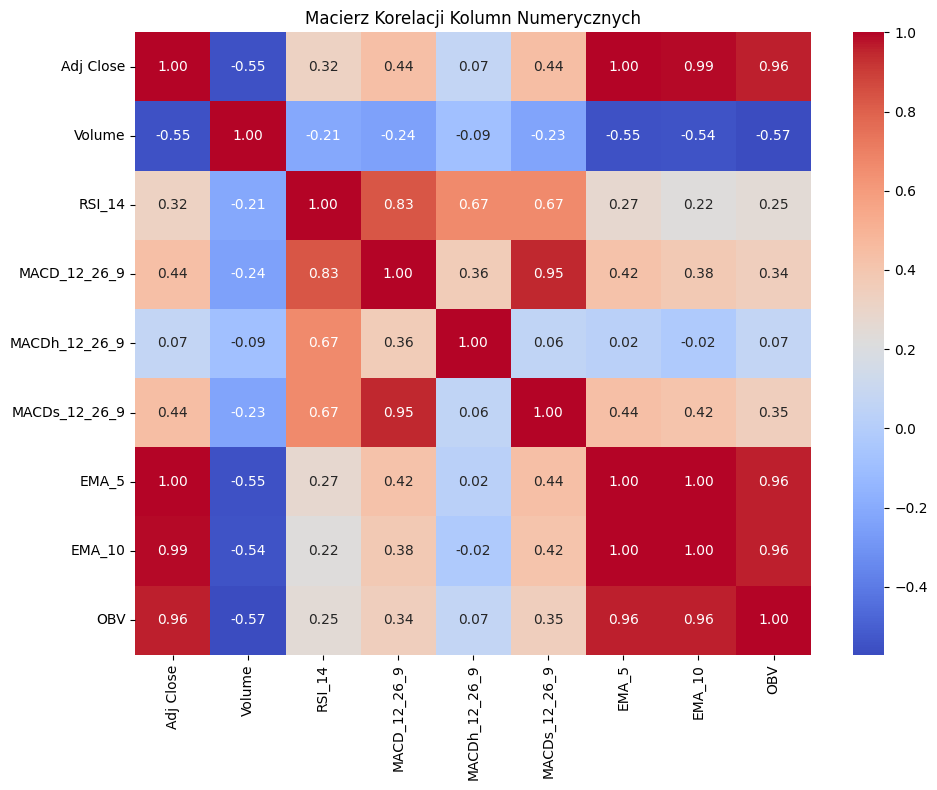

In [81]:
fig_corr, ax_corr = plt.subplots(figsize=(10, 8)) # Przypisanie figury do zmiennej fig_corr
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax_corr) # Użycie osi
ax_corr.set_title('Macierz Korelacji Kolumn Numerycznych')

# Dopełnienie kodu:
plt.tight_layout() # Dopasowuje układ, aby etykiety się nie nakładały
#plt.savefig('correlation_matrix.png') # Zapisz wykres do pliku (np. PNG)
plt.show() # Wyświetl wykres

In [82]:
df4['year']=df4.index.year
df4['month']=df4.index.month
df4['day']=df4.index.day
df4['weekday']=df4.index.weekday
df4['month_sin'] = np.sin(2 * np.pi * df4['month']/ 12)
df4['month_cos'] = np.cos(2 * np.pi * df4['month']/ 12)
df4['weekday_sin'] = np.sin(2 * np.pi * df4['weekday']/ 7)
df4['weekday_cos'] = np.cos(2 * np.pi * df4['weekday']/ 7)
df4

,Adj Close,Volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_5,EMA_10,OBV,year,month,day,weekday,month_sin,month_cos,weekday_sin,weekday_cos
Unnamed: 0,,,,,,,,,,,,,,,,,
2021-02-22,123.393822,18.459097,33.444667,-0.483569,-1.554734,1.071165,126.939845,128.913378,-0.213707,2021,2,22,0,8.660254e-01,0.500000,0.000000,1.000000
2021-02-23,123.256737,18.879832,33.222257,-0.934197,-1.604290,0.670093,125.712142,127.884898,-19.093539,2021,2,23,1,8.660254e-01,0.500000,0.781831,0.623490
2021-02-24,122.757286,18.525400,32.377448,-1.316449,-1.589234,0.272785,124.727190,126.952605,-37.618939,2021,2,24,2,8.660254e-01,0.500000,0.974928,-0.222521
2021-02-25,118.487450,18.814070,26.235321,-1.941546,-1.771464,-0.170081,122.647277,125.413486,-56.433009,2021,2,25,3,8.660254e-01,0.500000,0.433884,-0.900969
2021-02-26,118.751892,18.918788,27.156977,-2.388073,-1.774393,-0.613680,121.348815,124.202287,-37.514221,2021,2,26,4,8.660254e-01,0.500000,-0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,17.561604,67.626261,6.143964,0.452554,5.691410,255.832092,253.378619,1227.310578,2024,12,27,4,-2.449294e-16,1.000000,-0.433884,-0.900969
2024-12-30,252.199997,17.386662,60.225576,5.675828,-0.012466,5.688294,254.621394,253.164324,1209.923916,2024,12,30,0,-2.449294e-16,1.000000,0.000000,1.000000
2024-12-31,250.419998,17.491323,56.715906,5.102378,-0.468732,5.571111,253.220928,252.665356,1192.432593,2024,12,31,1,-2.449294e-16,1.000000,0.781831,0.623490


In [99]:
topredict='Adj Close'
for lag in [1, 3, 7, 14]:
    df4[f'value_lag_{lag}'] = df4[topredict].shift(lag)
    if lag != 1:
        df4[f'value_roll_mean_{lag}'] = df4[topredict].rolling(window=lag).mean().shift(lag)

df4['ChangePredict']=df4[topredict].diff()
df4.dropna(inplace=True)
df4


,Adj Close,Volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_5,EMA_10,OBV,year,...,weekday_sin,weekday_cos,value_lag_1,value_lag_3,value_roll_mean_3,value_lag_7,value_roll_mean_7,value_lag_14,value_roll_mean_14,ChangePredict
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2021-03-31,119.623482,18.588936,47.667730,-1.466005,0.293570,-1.759575,118.763373,118.939949,-56.749900,2021,...,0.974928,-0.222521,117.420013,118.702911,118.134911,120.837845,120.212467,119.437408,119.992118,2.203468
2021-04-01,120.455894,18.134186,49.497123,-1.246705,0.410296,-1.657001,119.327547,119.215575,-38.615714,2021,...,0.433884,-0.900969,119.623482,118.879196,118.559280,120.005402,120.423718,118.526642,119.644462,0.832413
2021-04-05,123.295914,18.300220,55.245456,-0.834128,0.658298,-1.492426,120.650336,119.957455,-20.315494,2021,...,0.000000,1.000000,120.455894,117.420013,118.334040,117.606087,119.878100,121.425415,119.513653,2.840019
2021-04-06,123.599495,18.199676,55.824281,-0.477161,0.812213,-1.289373,121.633389,120.619644,-2.115818,2021,...,0.781831,0.623490,123.295914,119.623482,118.640897,118.095734,119.181386,122.972733,119.529042,0.303581
2021-04-07,125.254562,18.239958,58.941979,-0.060019,0.983483,-1.043503,122.840447,121.462356,16.124141,2021,...,0.974928,-0.222521,123.599495,120.455894,119.166463,118.702911,118.684731,122.179497,119.792760,1.655067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,17.561604,67.626261,6.143964,0.452554,5.691410,255.832092,253.378619,1227.310578,2024,...,-0.433884,-0.900969,259.019989,255.270004,253.183334,253.479996,248.802859,242.839996,235.357855,-3.429993
2024-12-30,252.199997,17.386662,60.225576,5.675828,-0.012466,5.688294,254.621394,253.164324,1209.923916,2024,...,0.000000,1.000000,255.589996,258.200012,255.986674,248.050003,248.988573,246.750000,236.695711,-3.389999
2024-12-31,250.419998,17.491323,56.715906,5.102378,-0.468732,5.571111,253.220928,252.665356,1192.432593,2024,...,0.781831,0.623490,252.199997,259.019989,257.496668,249.789993,249.277143,247.770004,238.087855,-1.779999


In [100]:
X = df4.drop(columns=topredict)
y = df4[topredict]
X,y

(               Volume     RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  \
 Unnamed: 0                                                                     
 2021-03-31  18.588936  47.667730     -1.466005       0.293570      -1.759575   
 2021-04-01  18.134186  49.497123     -1.246705       0.410296      -1.657001   
 2021-04-05  18.300220  55.245456     -0.834128       0.658298      -1.492426   
 2021-04-06  18.199676  55.824281     -0.477161       0.812213      -1.289373   
 2021-04-07  18.239958  58.941979     -0.060019       0.983483      -1.043503   
 ...               ...        ...           ...            ...            ...   
 2024-12-27  17.561604  67.626261      6.143964       0.452554       5.691410   
 2024-12-30  17.386662  60.225576      5.675828      -0.012466       5.688294   
 2024-12-31  17.491323  56.715906      5.102378      -0.468732       5.571111   
 2025-01-02  17.832938  46.049064      4.070846      -1.200212       5.271058   
 2025-01-03  16.532524  46.0

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
ts_split = TimeSeriesSplit(n_splits=5)
models = {
        'LinearRegression': LinearRegression(),
        'Lasso (alpha: 0.1)': Lasso(alpha=0.05, random_state=42),
        'SVR': SVR( C=3, kernel='rbf', epsilon=0.1),
        'KNeighbors': KNeighborsRegressor(n_neighbors=5, weights='distance'),
        #'XGBoost': XGBRegressor(max_depth=4, subsample=0.8, random_state=42),
        'RandomForest': RandomForestRegressor(max_depth=4, random_state=42)
    }

In [102]:
results = {name: {"R²": [], "MAE": [], "RMSE": []} for name in models}
predictions = {name: [] for name in models}

# Skaler
scaler = StandardScaler()


# Trenowanie modeli i ewaluacja
for name, model in models.items():
    for i, (train_index, test_index) in enumerate(ts_split.split(X)):
        # Podział na dane treningowe i testowe
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if i ==0:
            X_train_scaled=scaler.fit_transform(X_train)
        else:
            X_train_scaled=scaler.transform(X_train)

        X_test_scaled = scaler.transform(X_test)


        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        results[name]['R²'].append(r2_score(y_test, y_pred))
        results[name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[name]['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred))) # Poprawione na MSE
        predictions[name].append((df.index[test_index], y_pred))


# Poniżej umieść swoje rozwiązanie
final_results = {name: {metric: np.mean(values) for metric, values in metrics.items()} for name, metrics in results.items()}

results_df = pd.DataFrame(final_results).T
results_df

,R²,MAE,RMSE
LinearRegression,1.000000,3.933782e-14,4.671855e-14
Lasso (alpha: 0.1),0.999780,1.279744e-01,1.600483e-01
SVR,-2.961430,1.839477e+01,2.125939e+01
KNeighbors,-0.552378,1.230001e+01,1.399484e+01
RandomForest,-0.502928,1.109252e+01,1.294613e+01


In [216]:
data = pd.read_csv('data/apple_stock.csv')
df = data[['Unnamed: 0', 'Adj Close', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
df[columndate] = pd.to_datetime(df[columndate])

df.set_index(columndate, inplace=True)

end_date = df.index.max()

start_date_5_years_ago = end_date - pd.DateOffset(years=5)

df = df.loc[start_date_5_years_ago:end_date].copy()

numerical_cols = df.select_dtypes(include=np.number).columns
skew = df[numerical_cols].skew()
log = skew[skew>1].index.values.tolist()
    #tworzenie slownika z kolumnami.

for i in log:
    df[i] = np.log1p(df[i])

#92z ponizzszym bez 94 
# df['year']=df.index.year
# df['month']=df.index.month
# df['day']=df.index.day
# df['weekday']=df.index.weekday


# df['month_sin'] = np.sin(2 * np.pi * df['month']/ 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month']/ 12)
# df['weekday_sin'] = np.sin(2 * np.pi * df['weekday']/ 7)
# df['weekday_cos'] = np.cos(2 * np.pi * df['weekday']/ 7)


#lag
for lag in [1, 3, 7, 14]:
    df[f'value_lag_{lag}'] = df[topredict].shift(lag)
    if lag != 1:
        df[f'value_roll_mean_{lag}'] = df[topredict].rolling(window=lag).mean().shift(lag)


#change
df['ChangePredict']=df[topredict].diff()

#change + lag 100%
df.dropna(inplace=True)

df

C:\Users\chris\AppData\Local\Temp\ipykernel_19292\3204263914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columndate] = pd.to_datetime(df[columndate])


,Adj Close,Volume,value_lag_1,value_lag_3,value_roll_mean_3,value_lag_7,value_roll_mean_7,value_lag_14,value_roll_mean_14,ChangePredict
Unnamed: 0,,,,,,,,,,
2020-02-12,79.491890,18.549341,77.647903,77.749954,78.160439,74.810135,76.565920,77.371971,75.259892,1.843987
2020-02-13,78.925819,18.366727,79.491890,78.119240,78.230179,77.279869,76.584617,77.148994,75.621370,-0.566071
2020-02-14,78.945267,18.198956,78.925819,77.647903,77.839032,77.910019,77.017417,74.880417,75.779778,0.019447
2020-02-18,77.499733,18.842880,78.945267,79.491890,78.419678,78.821342,77.277792,76.998718,76.113903,-1.445534
2020-02-19,78.622139,18.358635,77.499733,78.925819,78.688538,77.749954,77.154857,78.610497,76.480054,1.122406
...,...,...,...,...,...,...,...,...,...,...
2024-12-27,255.589996,17.561604,259.019989,255.270004,253.183334,253.479996,248.802859,242.839996,235.357855,-3.429993
2024-12-30,252.199997,17.386662,255.589996,258.200012,255.986674,248.050003,248.988573,246.750000,236.695711,-3.389999
2024-12-31,250.419998,17.491323,252.199997,259.019989,257.496668,249.789993,249.277143,247.770004,238.087855,-1.779999


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2020-02-12 to 2025-01-03
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Adj Close           1232 non-null   float64
 1   Volume              1232 non-null   float64
 2   value_lag_1         1232 non-null   float64
 3   value_lag_3         1232 non-null   float64
 4   value_roll_mean_3   1232 non-null   float64
 5   value_lag_7         1232 non-null   float64
 6   value_roll_mean_7   1232 non-null   float64
 7   value_lag_14        1232 non-null   float64
 8   value_roll_mean_14  1232 non-null   float64
 9   ChangePredict       1232 non-null   float64
dtypes: float64(10)
memory usage: 105.9 KB


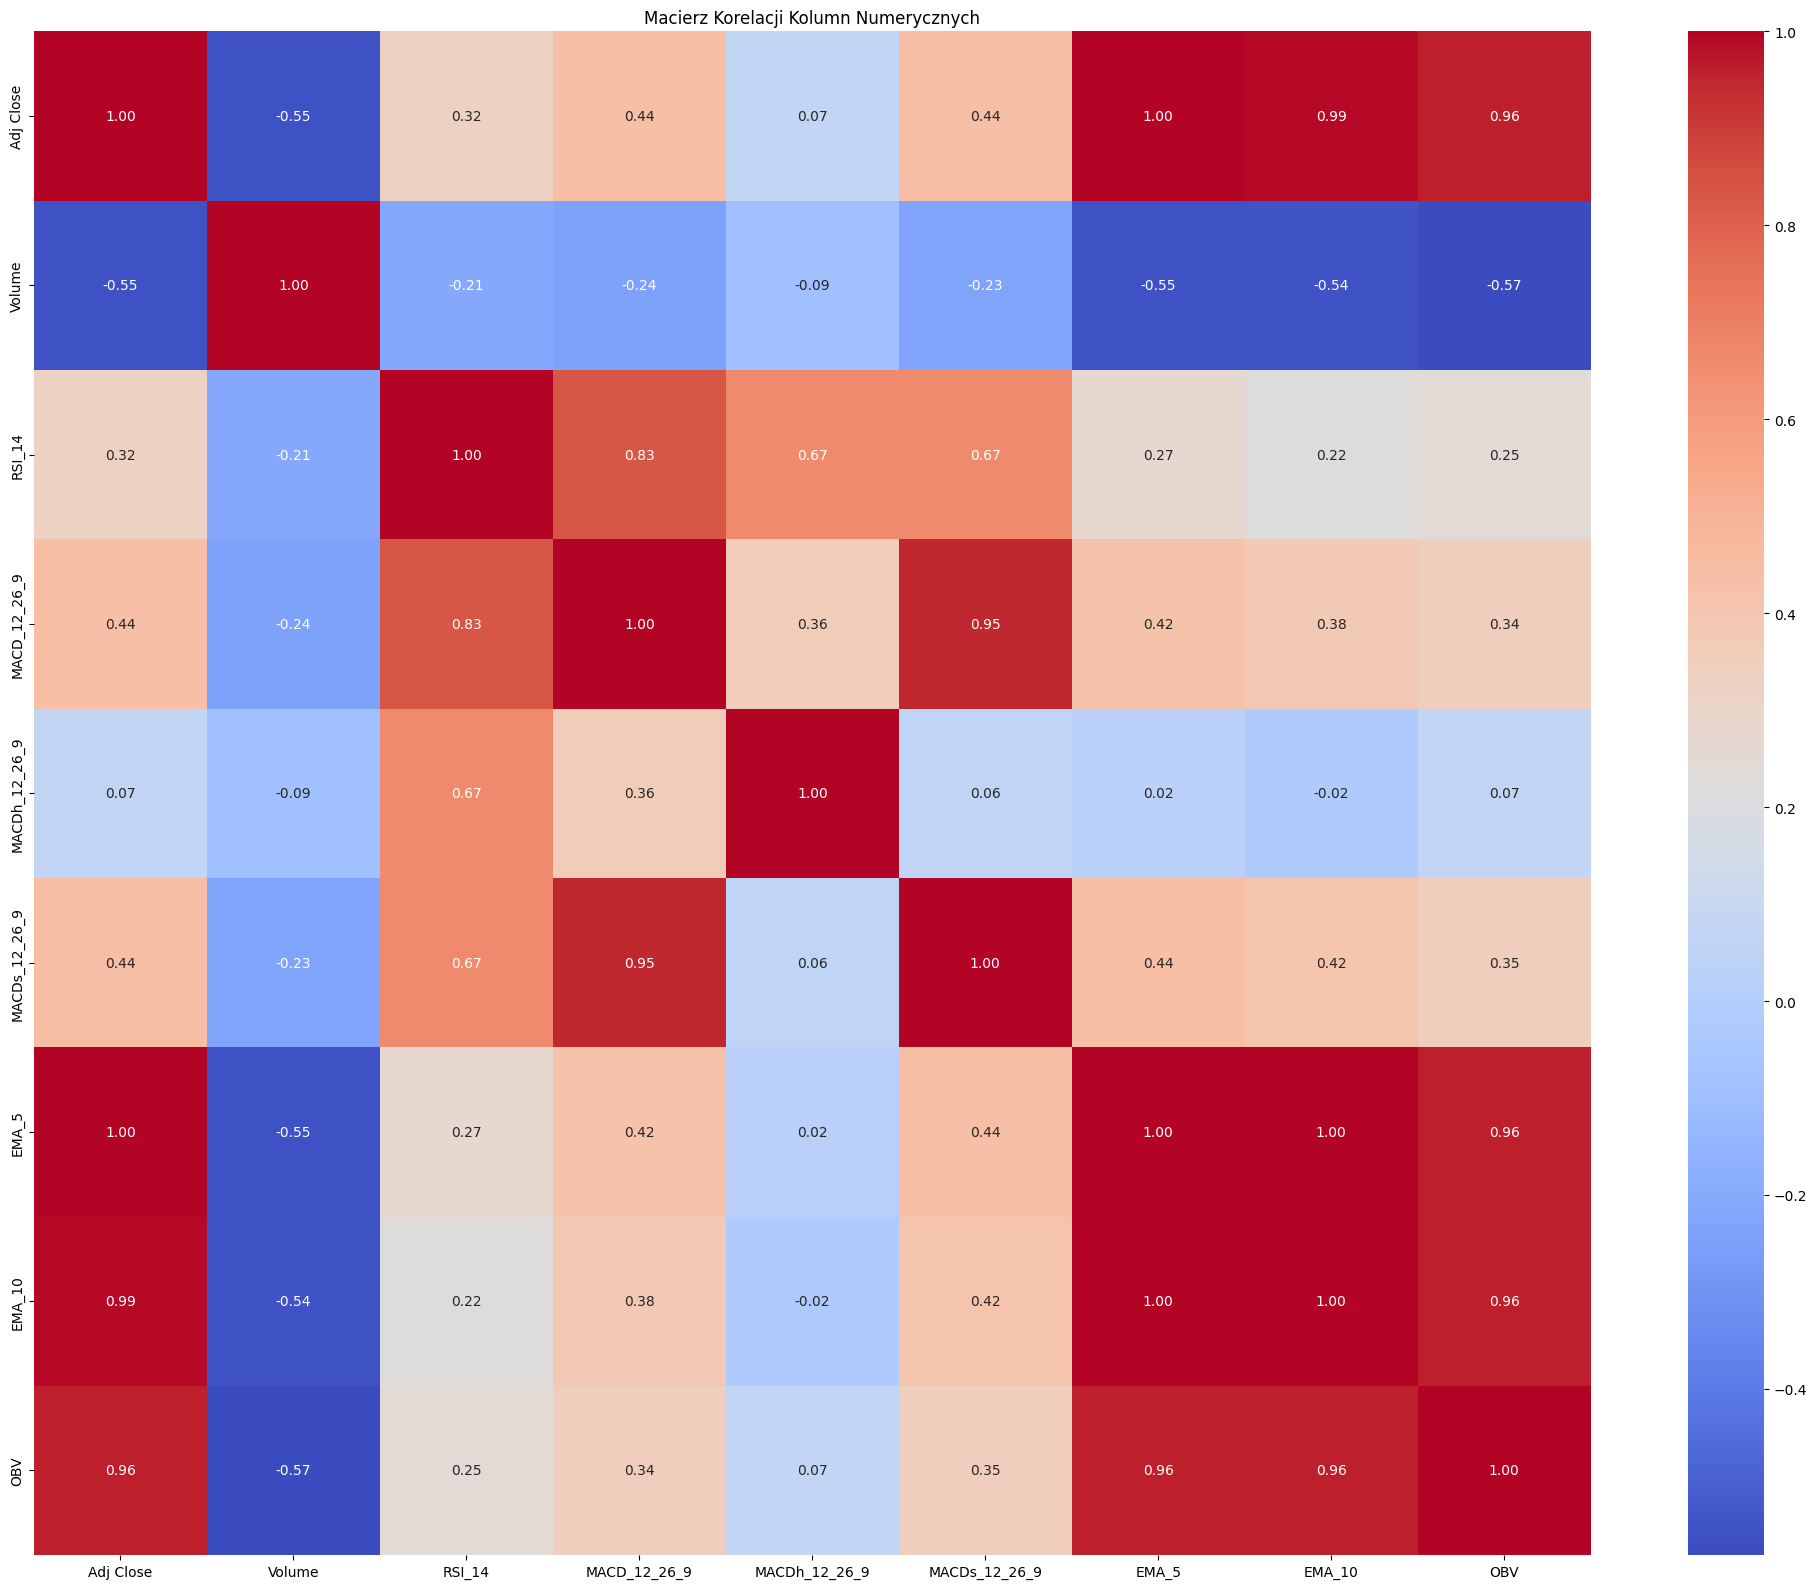

In [218]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
fig_corr, ax_corr = plt.subplots(figsize=(20, 16)) # Przypisz figurę do zmiennej
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax_corr) # Użyj osi
ax_corr.set_title('Macierz Korelacji Kolumn Numerycznych') # Ustaw tytuł na osi
plt.tight_layout() # Dopasowanie layoutu
# Zapisz wykres do bufora i zakoduj do Base64
plt.show()




In [219]:
predict='Adj Close'
X = df.drop(columns=predict)
y = df[predict]
ts_split = TimeSeriesSplit(n_splits=5)
models = {
    'LinearRegression': LinearRegression(),
    'Lasso (alpha: 0.1)': Lasso(alpha=0.05, random_state=42),
    'SVR': SVR( C=3, kernel='rbf', epsilon=0.1),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5, weights='distance'),
    #'XGBoost': XGBRegressor(max_depth=4, subsample=0.8, random_state=42),
    'RandomForest': RandomForestRegressor(max_depth=4, random_state=42)
}




results = {name: {"R²": [], "MAE": [], "RMSE": []} for name in models}
predictions = {name: [] for name in models}

# Skaler
scaler = StandardScaler()

# Trenowanie modeli i ewaluacja

# Trenowanie modeli i ewaluacja
for name, model in models.items():
    # Upewnij się, że scaler jest inicjalizowany poza pętlą modeli,
    # jeśli chcesz używać tego samego typu skalera dla wszystkich modeli,
    # ale RE-INICJALIZOWANY W KAŻDEJ FOLDZIE WALIDACJI KRZYŻOWEJ,
    # lub resetowany jego stan.
    # LUB, co jest prostsze i bezpieczniejsze: twórz nowy skaler w każdej foldzie.

    for i, (train_index, test_index) in enumerate(ts_split.split(X)):
        # Podział na dane treningowe i testowe
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # POPRAWIONE SKALOWANIE:
        # Twórz nową instancję skalera dla każdej foldy
        # lub zresetuj stan istniejącego skalera, jeśli jest to możliwe.
        # Najbezpieczniej jest stworzyć nową instancję.
        # Przykład dla StandardScaler (jeśli to jest Twój scaler)
        scaler = StandardScaler() # Załóżmy, że StandardScaler jest zdefiniowany wcześniej

        X_train_scaled = scaler.fit_transform(X_train) # Dopasuj i transformuj na DANYM ZBIORZE TRENINGOWYM
        X_test_scaled = scaler.transform(X_test)       # Transformuj zbiór testowy używając tego SAMEGO skalera

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        results[name]['R²'].append(r2_score(y_test, y_pred))
        results[name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[name]['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        predictions[name].append((df.index[test_index], y_pred))


# Poniżej umieść swoje rozwiązanie
final_results = {name: {metric: np.mean(values) for metric, values in metrics.items()} for name, metrics in results.items()}

results_df = pd.DataFrame(final_results).T
results_df


,R²,MAE,RMSE
LinearRegression,1.000000,3.070931e-14,3.685543e-14
Lasso (alpha: 0.1),0.999910,9.608966e-02,1.094940e-01
SVR,-4.673219,2.331217e+01,2.851818e+01
KNeighbors,-0.806000,1.357260e+01,1.631213e+01
RandomForest,-0.657954,1.256710e+01,1.558703e+01


C:\Users\chris\AppData\Local\Temp\ipykernel_19292\725073750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columndate] = pd.to_datetime(df[columndate])
C:\Users\chris\AppData\Local\Temp\ipykernel_19292\725073750.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = np.log1p(df[i])
C:\Users\chris\AppData\Local\Temp\ipykernel_19292\725073750.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


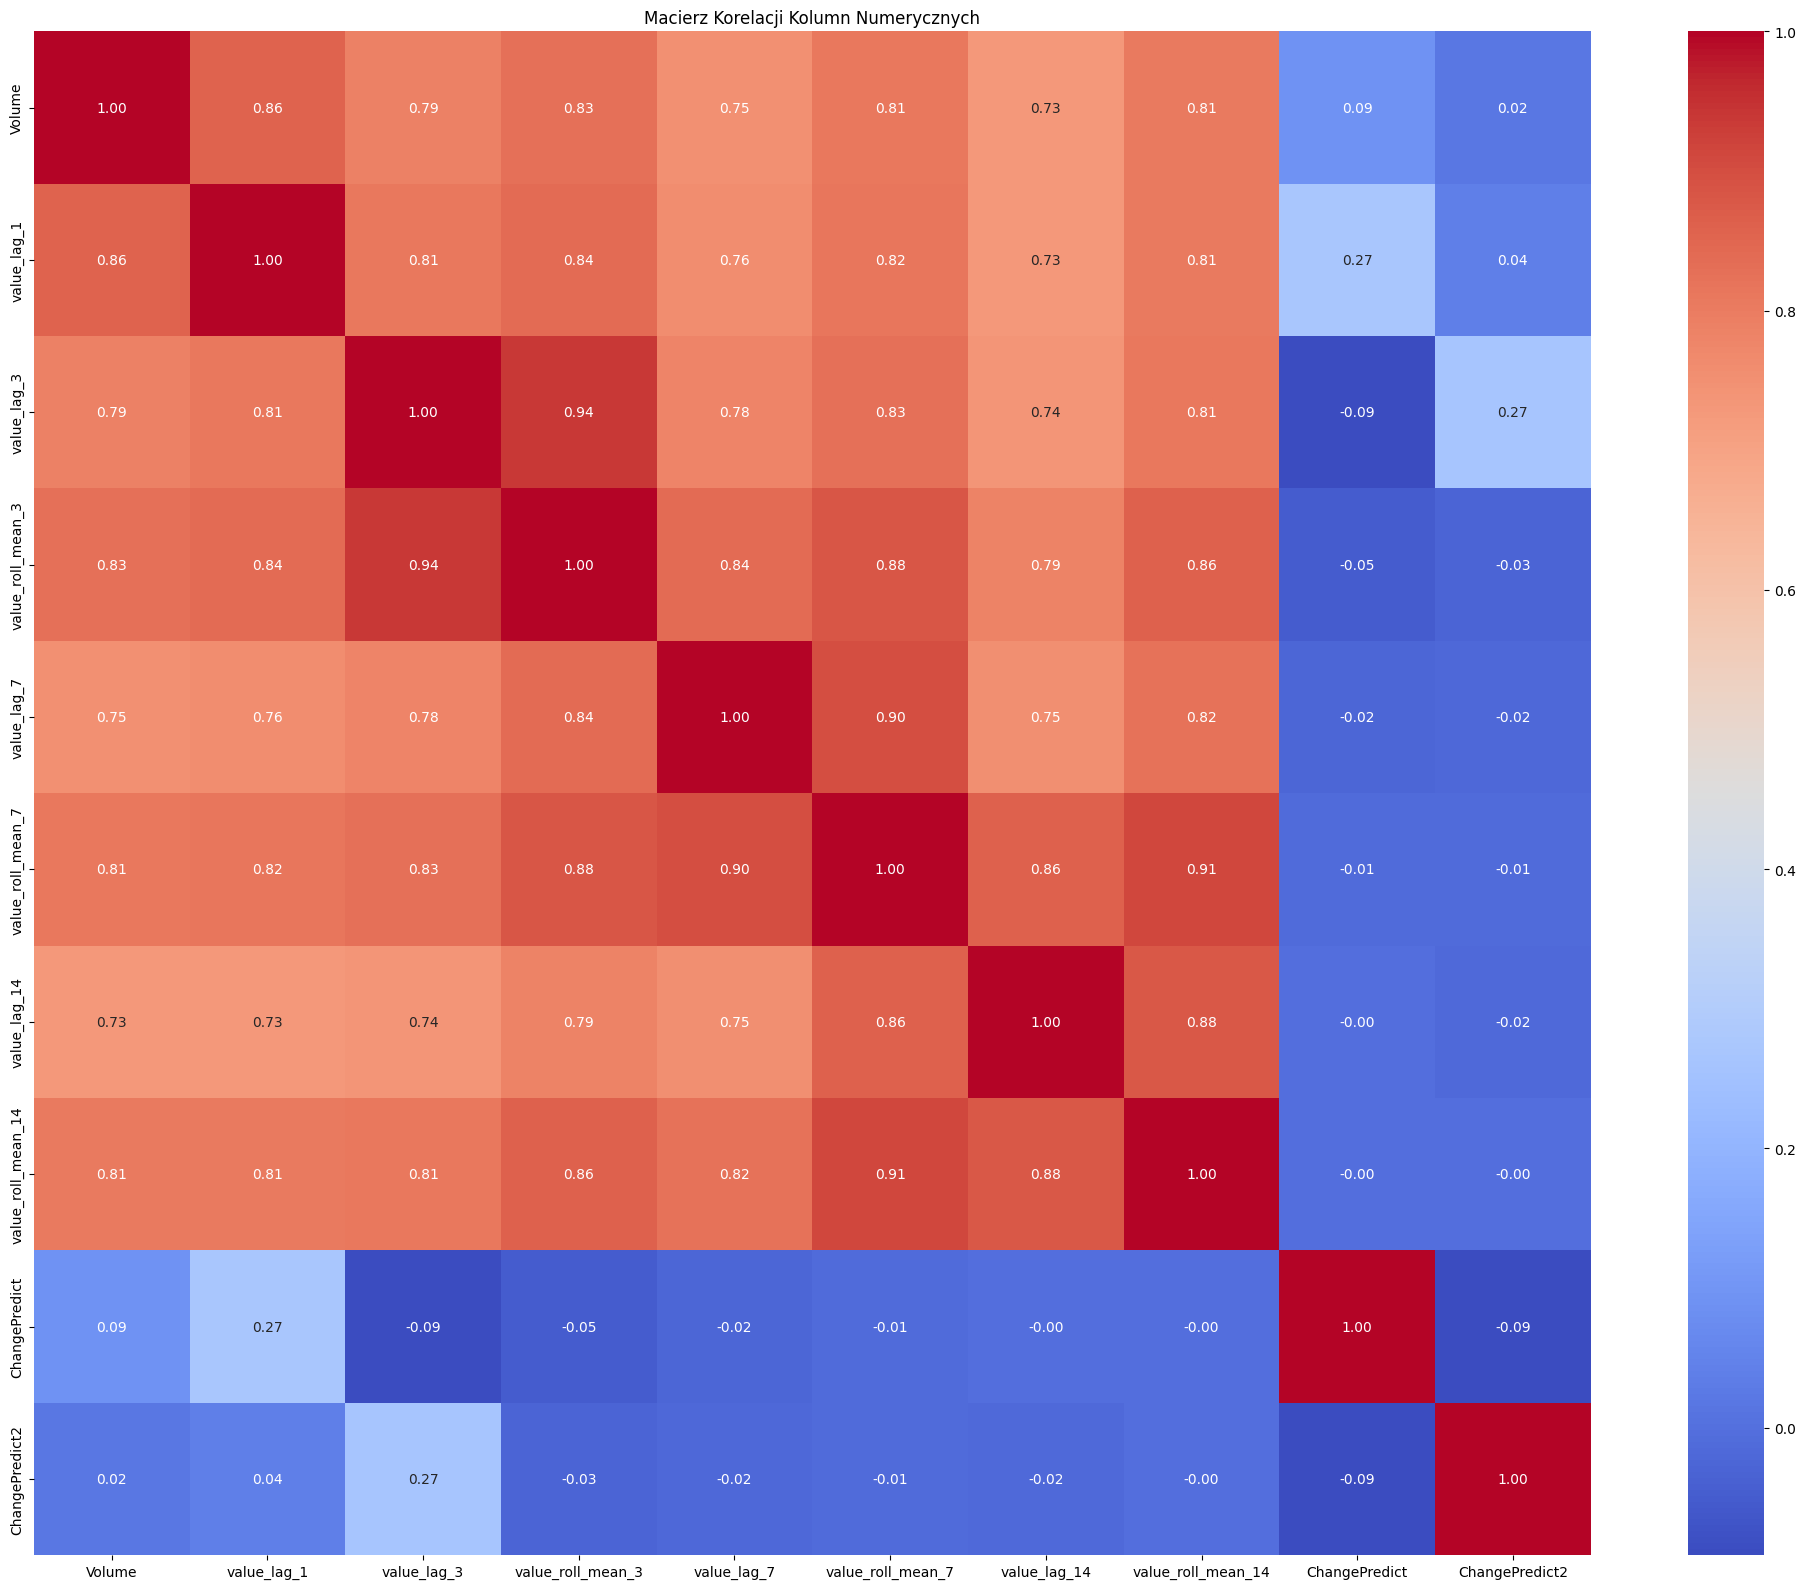

In [339]:
#przewidzenie Vol
data = pd.read_csv('data/apple_stock.csv')
df = data[['Unnamed: 0', 'Adj Close', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
df[columndate] = pd.to_datetime(df[columndate])

df.set_index(columndate, inplace=True)

# end_date = df.index.max()

# start_date_5_years_ago = end_date - pd.DateOffset(years=5)

# df = df.loc[start_date_5_years_ago:end_date].copy()

numerical_cols = df.select_dtypes(include=np.number).columns
skew = df[numerical_cols].skew()
log = skew[skew>1].index.values.tolist()
    #tworzenie slownika z kolumnami.



for i in log:
    df[i] = np.log1p(df[i])

topredict='Volume'

# df['year']=df.index.year
# df['month']=df.index.month
# df['day']=df.index.day
# df['weekday']=df.index.weekday


# df['month_sin'] = np.sin(2 * np.pi * df['month']/ 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month']/ 12)
# df['weekday_sin'] = np.sin(2 * np.pi * df['weekday']/ 7)
# df['weekday_cos'] = np.cos(2 * np.pi * df['weekday']/ 7)


for lag in [1, 3, 7, 14]:
    df[f'value_lag_{lag}'] = df[topredict].shift(lag)
    if lag != 1:
        df[f'value_roll_mean_{lag}'] = df[topredict].rolling(window=lag).mean().shift(lag)


#change
#df['ChangePredict']=df[topredict].diff()
df['ChangePredict']=df[topredict].diff().shift(1)
df['ChangePredict2']=df[topredict].diff().shift(3)

#change + lag 100%
df.dropna(inplace=True)
df=df.drop(columns='Adj Close')


numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
fig_corr, ax_corr = plt.subplots(figsize=(20, 16)) # Przypisz figurę do zmiennej
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax_corr) # Użyj osi
ax_corr.set_title('Macierz Korelacji Kolumn Numerycznych') # Ustaw tytuł na osi
plt.tight_layout() # Dopasowanie layoutu
# Zapisz wykres do bufora i zakoduj do Base64
plt.show()


In [340]:


predict='Volume'
X = df.drop(columns=predict)
y = df[predict]
ts_split = TimeSeriesSplit(n_splits=3)


results = {"R²": [], "MAE": [], "RMSE": []}
predictions = {name: [] for name in models}

# Skaler
scaler = StandardScaler()

model =  LinearRegression()
# Trenowanie modeli i ewaluacja

for i, (train_index, test_index) in enumerate(ts_split.split(X)):
        # Podział na dane treningowe i testowe
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # POPRAWIONE SKALOWANIE:
        # Twórz nową instancję skalera dla każdej foldy
        # lub zresetuj stan istniejącego skalera, jeśli jest to możliwe.
        # Najbezpieczniej jest stworzyć nową instancję.
        # Przykład dla StandardScaler (jeśli to jest Twój scaler)
        scaler = StandardScaler() # Załóżmy, że StandardScaler jest zdefiniowany wcześniej

        X_train_scaled = scaler.fit_transform(X_train) # Dopasuj i transformuj na DANYM ZBIORZE TRENINGOWYM
        X_test_scaled = scaler.transform(X_test)       # Transformuj zbiór testowy używając tego SAMEGO skalera

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

results['R²'].append(r2_score(y_test, y_pred))
results['MAE'].append(mean_absolute_error(y_test, y_pred))
results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
   



results_df = pd.DataFrame(results, index=['LR'])
results_df



,R²,MAE,RMSE
LR,0.751443,0.218687,0.280693


In [380]:
data = pd.read_csv('data/apple_stock.csv')
df = data[['Unnamed: 0', 'Adj Close', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
df[columndate] = pd.to_datetime(df[columndate])

df.set_index(columndate, inplace=True)
df=df.drop(columns='Adj Close')


dftrain = df[:-20]
dftest=df[-20:-10]

dftrain,dftest

C:\Users\chris\AppData\Local\Temp\ipykernel_19292\628317316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columndate] = pd.to_datetime(df[columndate])


(               Volume
 Unnamed: 0           
 1980-12-12  469033600
 1980-12-15  175884800
 1980-12-16  105728000
 1980-12-17   86441600
 1980-12-18   73449600
 ...               ...
 2024-11-27   33498400
 2024-11-29   28481400
 2024-12-02   48137100
 2024-12-03   38861000
 2024-12-04   44383900
 
 [11087 rows x 1 columns],
               Volume
 Unnamed: 0          
 2024-12-05  40033900
 2024-12-06  36870600
 2024-12-09  44649200
 2024-12-10  36914800
 2024-12-11  45205800
 2024-12-12  32777500
 2024-12-13  33155300
 2024-12-16  51694800
 2024-12-17  51356400
 2024-12-18  56774100)

In [392]:
column='Volume'
k=1.5
Q1 = dftrain[column].quantile(0.25)
Q3 = dftrain[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

dftrainclean = dftrain[(dftrain[column] >= lower_bound) & (dftrain[column] <= upper_bound)]

dftrainclean


,Volume
Unnamed: 0,
1980-12-12,469033600
1980-12-15,175884800
1980-12-16,105728000
1980-12-17,86441600
1980-12-18,73449600
...,...
2024-11-27,33498400
2024-11-29,28481400
2024-12-02,48137100


<Axes: xlabel='Unnamed: 0'>

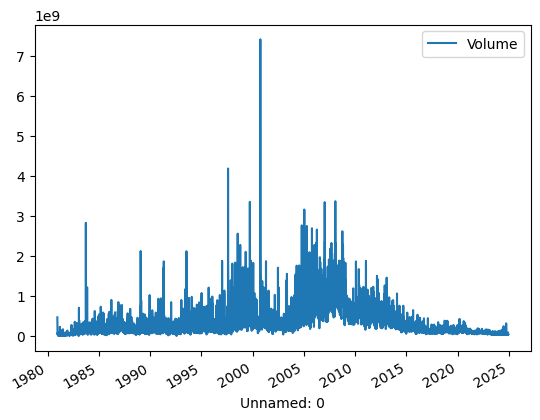

In [382]:
dftrain.plot(kind='line')

<Axes: xlabel='Unnamed: 0'>

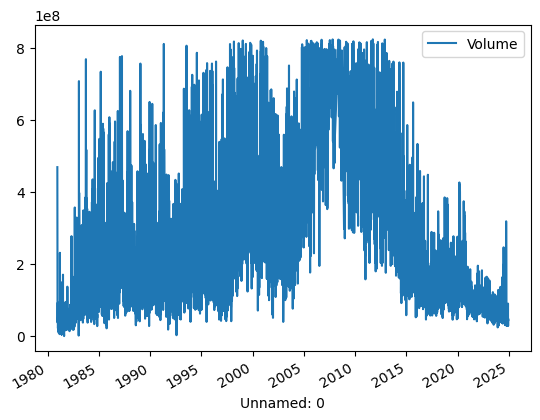

In [385]:
dftrain[(dftrain[column] >= lower_bound) & (dftrain[column] <= upper_bound)].plot(kind='line')

<Axes: xlabel='Unnamed: 0'>

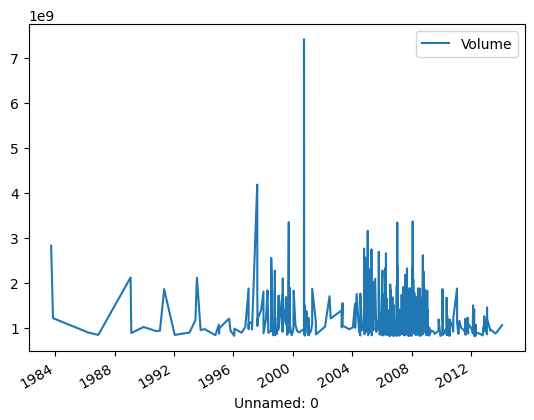

In [390]:
outliers=dftrain[(dftrain[column] <= lower_bound) | (dftrain[column] >= upper_bound)]
outliers.plot(kind='line')

In [391]:
len(outliers)/len(dftrain)


0.07197618832867322

<Axes: ylabel='Frequency'>

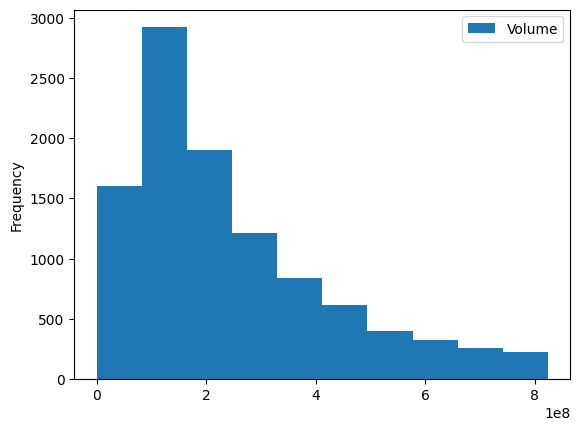

In [395]:
df=dftrainclean

df.plot(kind='hist')


In [397]:

numerical_cols = df.select_dtypes(include=np.number).columns
skew = df[numerical_cols].skew()
log = skew[skew>1].index.values.tolist()
    #tworzenie slownika z kolumnami.

skew

Volume    1.175181
dtype: float64

C:\Users\chris\AppData\Local\Temp\ipykernel_19292\1985249648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = np.log1p(df[i])
C:\Users\chris\AppData\Local\Temp\ipykernel_19292\1985249648.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'value_lag_{lag}'] = df[topredict].shift(lag)
C:\Users\chris\AppData\Local\Temp\ipykernel_19292\1985249648.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

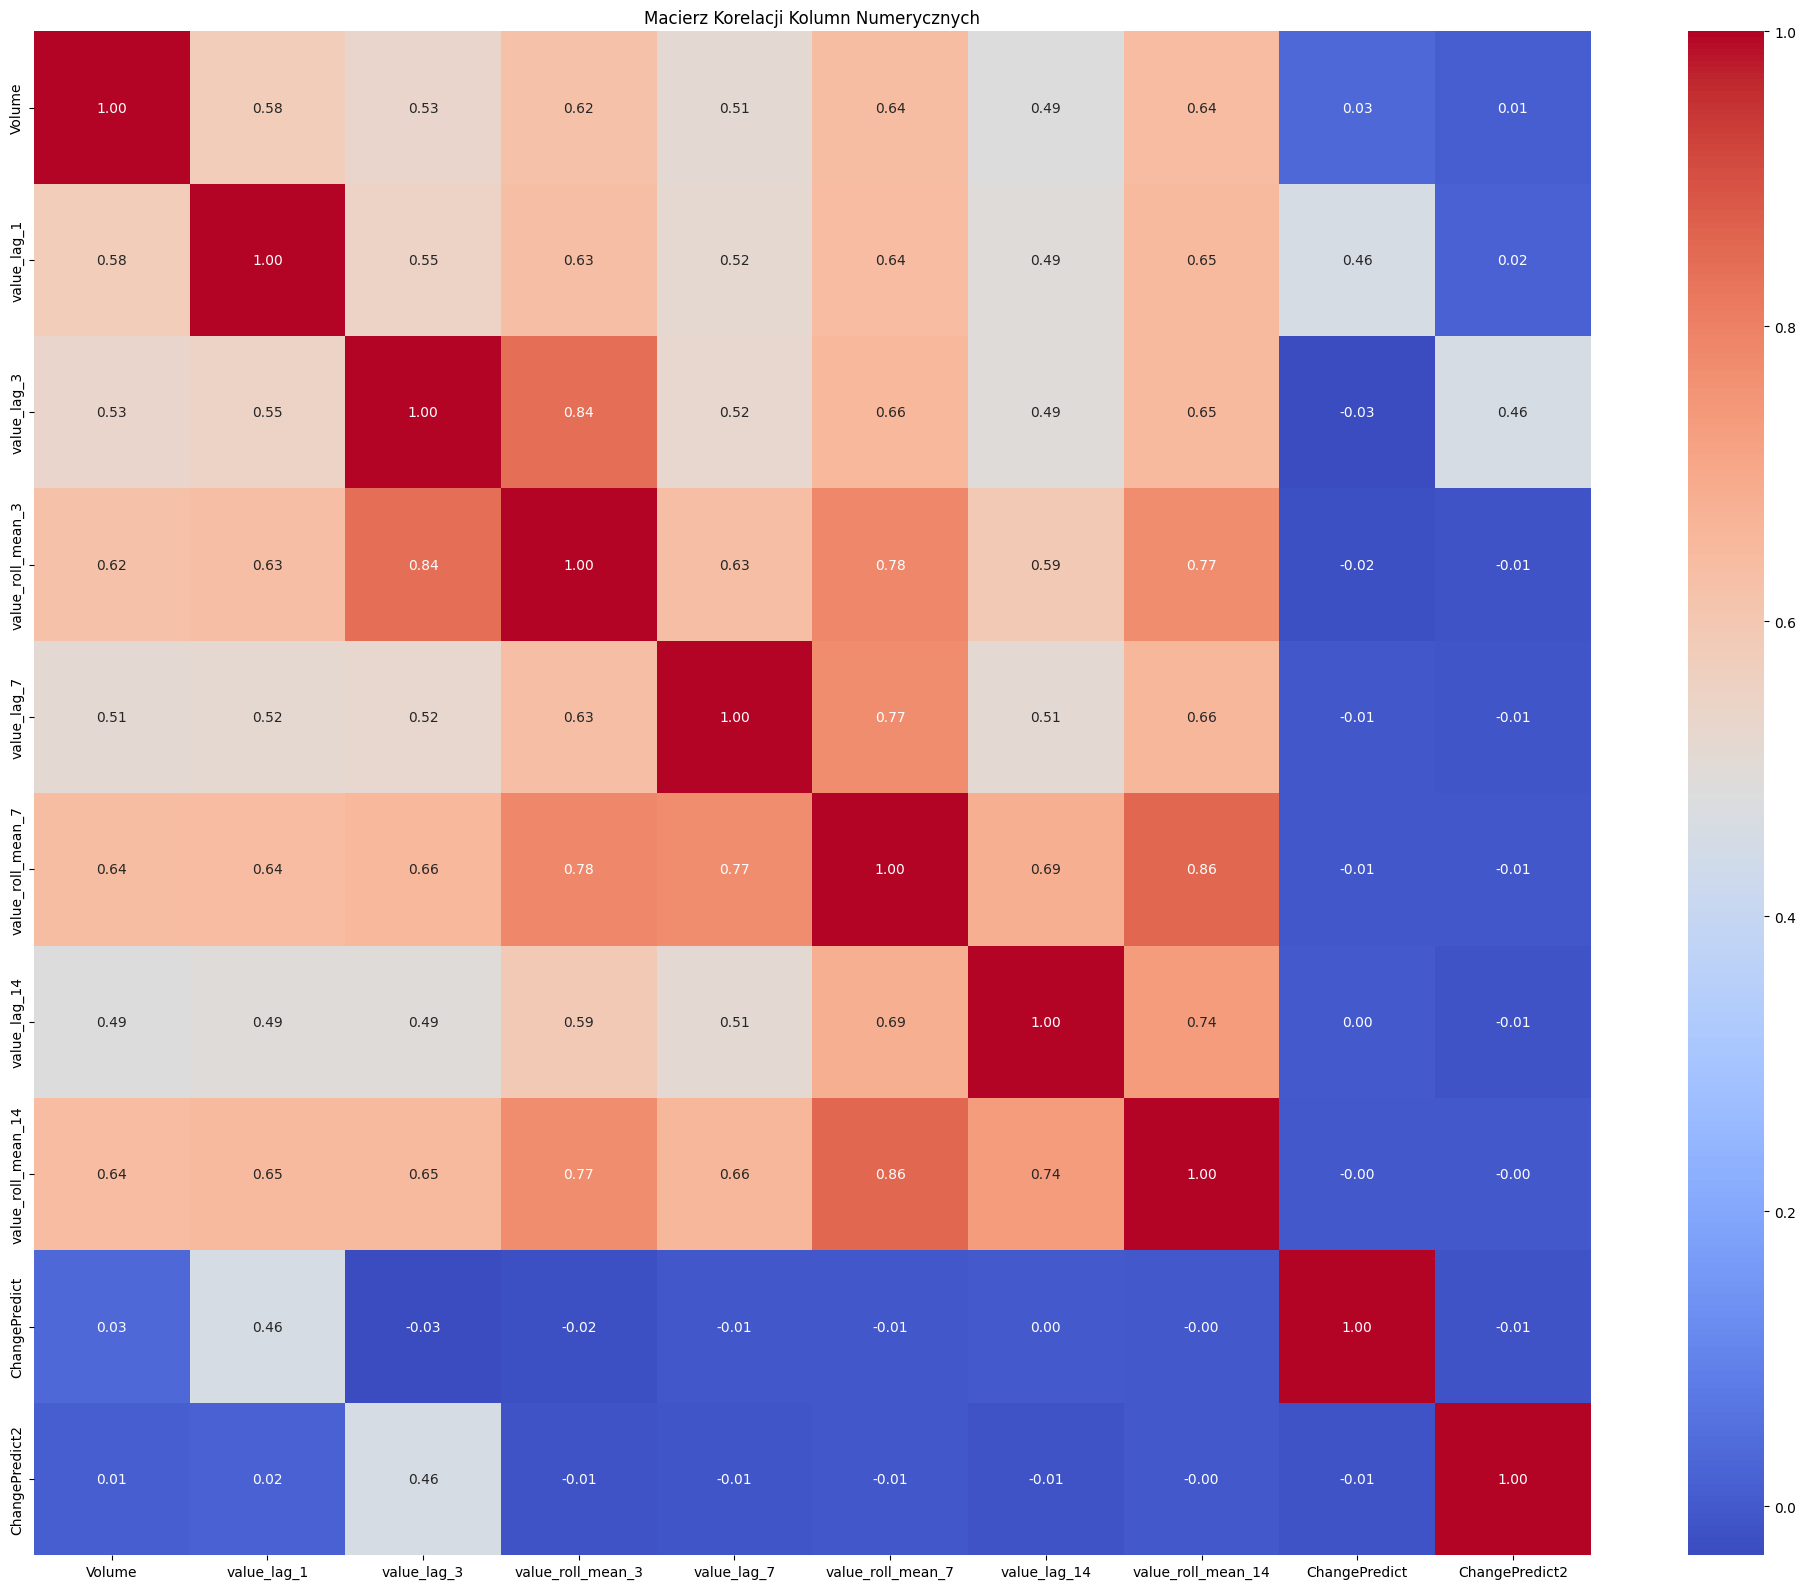

In [401]:

for i in log:
    df[i] = np.log1p(df[i])

topredict='Volume'

# df['year']=df.index.year
# df['month']=df.index.month
# df['day']=df.index.day
# df['weekday']=df.index.weekday


# df['month_sin'] = np.sin(2 * np.pi * df['month']/ 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month']/ 12)
# df['weekday_sin'] = np.sin(2 * np.pi * df['weekday']/ 7)
# df['weekday_cos'] = np.cos(2 * np.pi * df['weekday']/ 7)


for lag in [1, 3, 7, 14]:
    df[f'value_lag_{lag}'] = df[topredict].shift(lag)
    if lag != 1:
        df[f'value_roll_mean_{lag}'] = df[topredict].rolling(window=lag).mean().shift(lag)


#change
#df['ChangePredict']=df[topredict].diff()
df['ChangePredict']=df[topredict].diff().shift(1)
df['ChangePredict2']=df[topredict].diff().shift(3)

#change + lag 100%
df.dropna(inplace=True)



numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
fig_corr, ax_corr = plt.subplots(figsize=(20, 16)) # Przypisz figurę do zmiennej
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax_corr) # Użyj osi
ax_corr.set_title('Macierz Korelacji Kolumn Numerycznych') # Ustaw tytuł na osi
plt.tight_layout() # Dopasowanie layoutu
# Zapisz wykres do bufora i zakoduj do Base64
plt.show()


In [472]:
df.tail(10)

,Volume,value_lag_1,value_lag_3,value_roll_mean_3,value_lag_7,value_roll_mean_7,value_lag_14,value_roll_mean_14,ChangePredict,ChangePredict2
Unnamed: 0,,,,,,,,,,
2024-11-20,2.911029,2.912617,2.927728,2.926810,2.920648,2.922713,2.943394,2.920045,-0.011360,0.003465
2024-11-21,2.920780,2.911029,2.923977,2.925322,2.918543,2.919058,2.944131,2.921923,-0.001588,-0.003751
2024-11-22,2.915472,2.920780,2.912617,2.921440,2.928440,2.919651,2.924287,2.920536,0.009751,-0.011360
2024-11-25,2.960986,2.915472,2.911029,2.915874,2.924262,2.923294,2.898763,2.919782,-0.005308,-0.001588
2024-11-26,2.925516,2.960986,2.920780,2.914808,2.927728,2.922305,2.934645,2.921717,0.045515,0.009751
2024-11-27,2.908376,2.925516,2.915472,2.915760,2.923977,2.922757,2.920818,2.921345,-0.035470,-0.005308
2024-11-29,2.899484,2.908376,2.960986,2.932413,2.912617,2.922316,2.915699,2.921560,-0.017141,0.045515
2024-12-02,2.927965,2.899484,2.925516,2.933991,2.911029,2.920942,2.920648,2.921862,-0.008892,-0.035470
2024-12-03,2.916446,2.927965,2.908376,2.931626,2.920780,2.921262,2.918543,2.920874,0.028482,-0.017141


0.007166787666252894

In [489]:
from datetime import timedelta

dumy = pd.DataFrame()
new_date = df.index[-1] + timedelta(days=1)

# 1. Zbieramy wszystkie wartości do jednego słownika
single_row_data = {
    # --- Cechy oparte na konkretnych lagach (wartość sprzed X dni) ---
    f'{topredict}_lag_1': df[topredict].iloc[-1], # Ostatnia wartość z df
    f'{topredict}_lag_3': df[topredict].iloc[-3] if len(df) >= 3 else np.nan,
    f'{topredict}_lag_7': df[topredict].iloc[-7] if len(df) >= 7 else np.nan,
    f'{topredict}_lag_14': df[topredict].iloc[-14] if len(df) >= 14 else np.nan,

    # --- Cechy oparte na średnich kroczących (średnia z okna X dni, kończąca się Y dni temu) ---
    # `_roll_mean_3` dla `new_date` to średnia z ostatnich 3 wartości w `df[topredict]`
    # kończących się 3 dni przed `new_date`. Czyli średnia z wartości `.iloc[-4:-1]`.
    f'{topredict}_roll_mean_3': df[topredict].iloc[-4:-1].mean() if len(df) >= 4 else np.nan,
    f'{topredict}_roll_mean_7': df[topredict].iloc[-8:-1].mean() if len(df) >= 8 else np.nan,
    f'{topredict}_roll_mean_14': df[topredict].iloc[-15:-1].mean() if len(df) >= 15 else np.nan,
    
    # --- Nowe cechy: Różnice między konkretnymi, ostatnimi wartościami ---
    # Różnica pomiędzy ostatnią a przedostatnią wartością w df
    # Jest to odpowiednik df[topredict].diff().shift(1) dla nowego rekordu
    'ChangePredict': df[topredict].iloc[-1] - df[topredict].iloc[-2] if len(df) >= 2 else np.nan,
    
    # Różnica pomiędzy przedostatnią a trzecią od końca wartością w df
    # Jest to odpowiednik df[topredict].diff().shift(X) dla X > 1 dla nowego rekordu
    'ChangePredict2': df[topredict].iloc[-2] - df[topredict].iloc[-3] if len(df) >= 3 else np.nan,

}

# 2. Tworzymy DataFrame z tego słownika.
# Słownik staje się danymi, a indeks jest listą zawierającą naszą pojedynczą datę.
dumy = pd.DataFrame([single_row_data], index=[new_date])


dumy

,Volume_lag_1,Volume_lag_3,Volume_lag_7,Volume_lag_14,Volume_roll_mean_3,Volume_roll_mean_7,Volume_roll_mean_14,ChangePredict,ChangePredict2
2024-12-05,2.923612,2.927965,2.960986,2.924262,2.914631,2.922035,2.921648,0.007167,-0.01152


In [505]:

X = df.drop(columns=predict)
y = df[predict]
ts_split = TimeSeriesSplit(n_splits=3)


results = {"R²": [], "MAE": [], "RMSE": []}
predictions = {name: [] for name in models}

# Skaler
scaler = StandardScaler()

model =  LinearRegression()
# Trenowanie modeli i ewaluacja

for i, (train_index, test_index) in enumerate(ts_split.split(X)):
        # Podział na dane treningowe i testowe
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # POPRAWIONE SKALOWANIE:
        # Twórz nową instancję skalera dla każdej foldy
        # lub zresetuj stan istniejącego skalera, jeśli jest to możliwe.
        # Najbezpieczniej jest stworzyć nową instancję.
        # Przykład dla StandardScaler (jeśli to jest Twój scaler)
        scaler = StandardScaler() # Załóżmy, że StandardScaler jest zdefiniowany wcześniej

        X_train_scaled = scaler.fit_transform(X_train) # Dopasuj i transformuj na DANYM ZBIORZE TRENINGOWYM
        X_test_scaled = scaler.transform(X_test)       # Transformuj zbiór testowy używając tego SAMEGO skalera

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

results['R²'].append(r2_score(y_test, y_pred))
results['MAE'].append(mean_absolute_error(y_test, y_pred))
results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
   



results_df = pd.DataFrame(results, index=['LR'])
results_df


,R²,MAE,RMSE
LR,0.662604,0.012376,0.015502


Rozmiar zbioru treningowego: 8885
Rozmiar zbioru testowego: 2222
------------------------------
Wybrane parametry ARIMA: (5, 1, 0)
------------------------------
Trenowanie zakończone. Podsumowanie modelu:
                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 8885
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -183161.302
Date:                Sun, 29 Jun 2025   AIC                         366334.604
Time:                        04:22:59   BIC                         366377.156
Sample:                             0   HQIC                        366349.093
                               - 8885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L

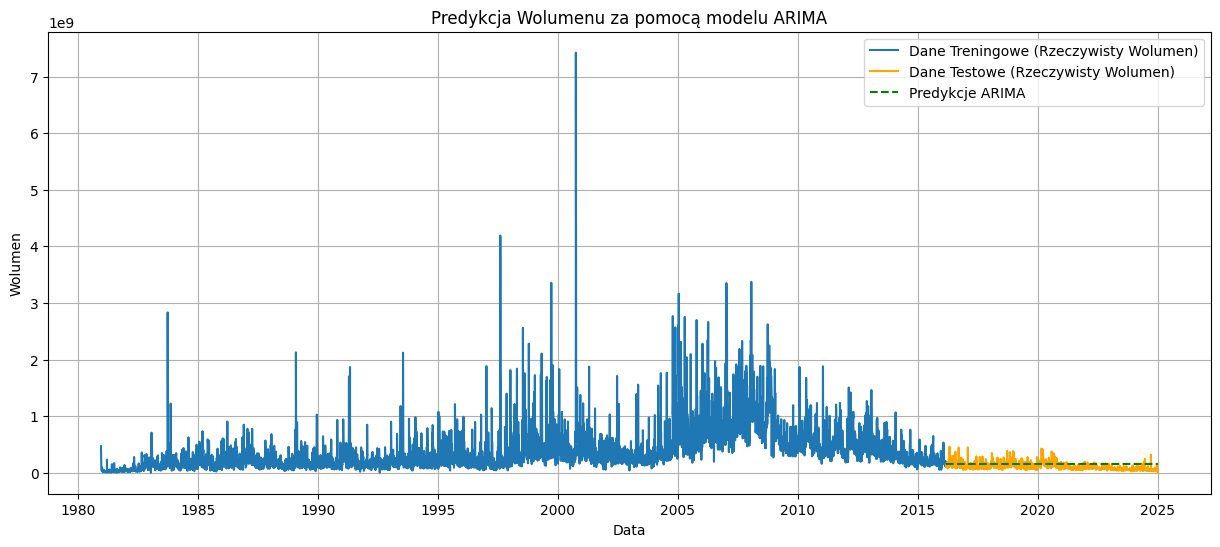

Prognoza wolumenu na kolejne 10 dni:
8885    1.518119e+08
8886    1.554523e+08
8887    1.541098e+08
8888    1.555579e+08
8889    1.562067e+08
8890    1.544397e+08
8891    1.545385e+08
8892    1.547841e+08
8893    1.548828e+08
8894    1.549934e+08
Name: predicted_mean, dtype: float64


In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Ignoruj ostrzeżenia, które czasami pojawiają się przy modelach ARIMA
warnings.filterwarnings("ignore")
data = pd.read_csv('data/apple_stock.csv')
data = data[['Unnamed: 0', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
data[columndate] = pd.to_datetime(data[columndate])
data.set_index(columndate, inplace=True)

df=data

train_size = int(len(df) * 0.8)
train_data, test_data = df[0:train_size], df[train_size:len(df)]

print(f"Rozmiar zbioru treningowego: {len(train_data)}")
print(f"Rozmiar zbioru testowego: {len(test_data)}")
print("-" * 30)
order = (5, 1, 0) 
print(f"Wybrane parametry ARIMA: {order}")
print("-" * 30)

model = ARIMA(train_data['Volume'], order=order)
model_fit = model.fit()

print("Trenowanie zakończone. Podsumowanie modelu:")
print(model_fit.summary())
print("-" * 30)

# start i end określają, od kiedy do kiedy chcemy prognozować
# Używamy indeksów zbioru testowego
start_index = len(train_data)
end_index = len(df) - 1

# Dokonujemy prognozy na danych testowych
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Upewniamy się, że indeksy prognoz pasują do indeksów danych testowych
predictions.index = test_data.index

print("Przykładowe predykcje:")
print(predictions.head())
print("-" * 30)

# --- 6. Ocena modelu ---
rmse = np.sqrt(mean_squared_error(test_data['Volume'], predictions))
r2 = r2_score(test_data['Volume'], predictions)

print(f"RMSE (zbiór testowy): {rmse:.2f}")
print(f"R2 (zbiór testowy): {r2:.4f}")
print("-" * 30)

# --- 7. Wizualizacja wyników ---
plt.figure(figsize=(15, 6))
plt.plot(train_data['Volume'], label='Dane Treningowe (Rzeczywisty Wolumen)')
plt.plot(test_data['Volume'], label='Dane Testowe (Rzeczywisty Wolumen)', color='orange')
plt.plot(predictions, label='Predykcje ARIMA', color='green', linestyle='--')
plt.title('Predykcja Wolumenu za pomocą modelu ARIMA')
plt.xlabel('Data')
plt.ylabel('Wolumen')
plt.legend()
plt.grid(True)
plt.show()

# --- 8. Przewidywanie kolejnych wartości poza zakresem danych ---
# Aby przewidzieć kolejne np. 10 dni po zakończeniu test_data
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

print(f"Prognoza wolumenu na kolejne {forecast_steps} dni:")
print(forecast)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import warnings

# Ignoruj ostrzeżenia, które czasami pojawiają się przy modelach ARIMA
warnings.filterwarnings("ignore")

# --- 1. Ładowanie i wstępne przygotowanie danych ---
try:
    data = pd.read_csv('data/apple_stock.csv')
except FileNotFoundError:
    print("Błąd: Plik 'data/apple_stock.csv' nie został znaleziony.")
    print("Upewnij się, że plik znajduje się w katalogu 'data/' lub podaj pełną ścieżkę.")
    exit()

data = data[['Unnamed: 0', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
data[columndate] = pd.to_datetime(data[columndate])
data.set_index(columndate, inplace=True)
data.sort_index(inplace=True) # Zawsze sortuj indeks czasowy!

# --- 2. Filtrowanie danych do ostatnich 5 lat ---
end_date = data.index.max()
start_date_5_years_ago = end_date - pd.DateOffset(years=5)

df_recent = data.loc[start_date_5_years_ago:end_date].copy()
data = df_recent

print(f"Dane po filtracji 5 lat: od {data.index.min().date()} do {data.index.max().date()}")
print(f"Liczba obserwacji w ostatnich 5 latach: {len(data)}")
print("-" * 30)

# --- 3. Usuwanie outlierów z 'Volume' ---
Q1 = data['Volume'].quantile(0.25)
Q3 = data['Volume'].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

lower_bound = Q1 - iqr_multiplier * IQR
upper_bound = Q3 + iqr_multiplier * IQR

outlier_mask = (data['Volume'] < lower_bound) | (data['Volume'] > upper_bound)
data = data[~outlier_mask].copy()

print(f"Liczba obserwacji po usunięciu outlierów: {len(data)}")
print("-" * 30)

# --- 4. Podział danych na zbiór treningowy i testowy (Twoja logika) ---
# Ważne: teraz będziemy polegać na 'data' jako źródle zarówno train, jak i test.
train_end_date_str = '2024-11-29'
test_end_date_str = '2025-01-02'

dftrain = data[:train_end_date_str].copy()
dftest = data[train_end_date_str:test_end_date_str].copy() # Test data zaczyna się od tej daty włącznie

# Upewniamy się, że nie ma nakładania, jeśli '2024-11-29' ma być tylko w test
# Jeśli '2024-11-29' ma być tylko w test_data, zmień:
# dftrain = data[:pd.to_datetime(train_end_date_str) - pd.Timedelta(days=1)].copy()
# dftest = data[train_end_date_str:test_end_date_str].copy()


# Przypisanie do zmiennych używanych w dalszej części skryptu
train_data, test_data = dftrain, dftest

print(f"Rozmiar zbioru treningowego: {len(train_data)} (od {train_data.index.min().date()} do {train_data.index.max().date()})")
print(f"Rozmiar zbioru testowego: {len(test_data)} (od {test_data.index.min().date()} do {test_data.index.max().date()})")
print("-" * 30)

if test_data.empty:
    print("Błąd: Zbiór testowy jest pusty po podziale. Sprawdź zakresy dat i dostępność danych w 'apple_stock.csv'.")
    exit()

# --- 5. Konfiguracja i trenowanie modelu ARIMA ---
order = (5, 1, 0)
print(f"Wybrane parametry ARIMA: {order}")
print("-" * 30)

model = ARIMA(train_data['Volume'], order=order)
model_fit = model.fit()

print("Trenowanie zakończone. Podsumowanie modelu:")
print(model_fit.summary())
print("-" * 30)


Dane po filtracji 5 lat: od 2020-01-03 do 2025-01-03
Liczba obserwacji w ostatnich 5 latach: 1259
------------------------------
Liczba obserwacji po usunięciu outlierów: 1191
------------------------------
Rozmiar zbioru treningowego: 1168 (od 2020-01-03 do 2024-11-29)
Rozmiar zbioru testowego: 23 (od 2024-11-29 do 2025-01-02)
------------------------------
Wybrane parametry ARIMA: (5, 1, 0)
------------------------------
Trenowanie zakończone. Podsumowanie modelu:
                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1168
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -21346.007
Date:                Sun, 29 Jun 2025   AIC                          42704.013
Time:                        04:34:31   BIC                          42734.387
Sample:                             0   HQIC                         42715.470
                               - 1168                  

C:\Users\chris\AppData\Local\Temp\ipykernel_8284\4202551356.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Dane po filtracji 5 lat: od 2022-01-03 do 2025-01-03
Liczba obserwacji w ostatnich 5 latach: 755
------------------------------
predicted=48432037.154190, expected=49947900.000000
predicted=48704464.507623, expected=75158300.000000
predicted=63319328.538092, expected=50080500.000000
predicted=52169546.603530, expected=47471400.000000
predicted=52319940.037516, expected=54156800.000000
predicted=53740231.792959, expected=41181800.000000
predicted=47456691.784222, expected=53103900.000000
predicted=52886622.407878, expected=97262100.000000
predicted=75152147.615722, expected=97862700.000000
predicted=81425654.456195, expected=70122700.000000
predicted=71783737.463995, expected=93728300.000000
predicted=84920704.629816, expected=79943300.000000
predicted=80299394.953893, expected=86172500.000000
predicted=87479281.491996, expected=80727000.000000
predicted=82314759.788682, expected=56713900.000000
predicted=68493139.190702, expected=66213200.000000
predicted=71392134.919627, expected=4977

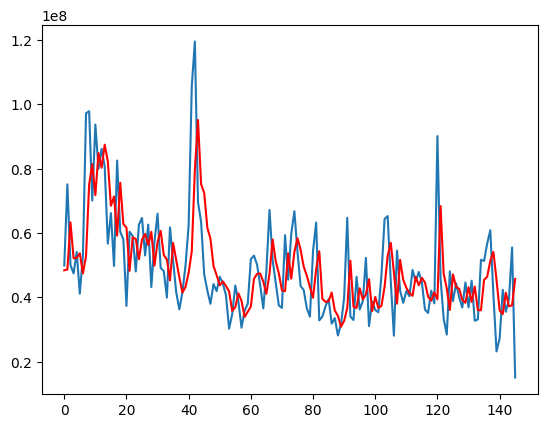

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
# --- 1. Ładowanie i wstępne przygotowanie danych ---
try:
    data = pd.read_csv('data/apple_stock.csv')
except FileNotFoundError:
    print("Błąd: Plik 'data/apple_stock.csv' nie został znaleziony.")
    print("Upewnij się, że plik znajduje się w katalogu 'data/' lub podaj pełną ścieżkę.")
    exit()

data = data[['Unnamed: 0', 'Volume']]
columndate = data.dtypes.loc[data.dtypes == 'object'].index[0]
data[columndate] = pd.to_datetime(data[columndate])
data.set_index(columndate, inplace=True)
data.sort_index(inplace=True) # Zawsze sortuj indeks czasowy!

# --- 2. Filtrowanie danych do ostatnich 5 lat ---
end_date = data.index.max()
start_date_5_years_ago = end_date - pd.DateOffset(years=3)

df_recent = data.loc[start_date_5_years_ago:end_date].copy()
data = df_recent

print(f"Dane po filtracji 5 lat: od {data.index.min().date()} do {data.index.max().date()}")
print(f"Liczba obserwacji w ostatnich 5 latach: {len(data)}")
print("-" * 30)

# --- 3. Usuwanie outlierów z 'Volume' ---
Q1 = data['Volume'].quantile(0.25)
Q3 = data['Volume'].quantile(0.75)
IQR = Q3 - Q1
iqr_multiplier = 1.5

lower_bound = Q1 - iqr_multiplier * IQR
upper_bound = Q3 + iqr_multiplier * IQR

outlier_mask = (data['Volume'] < lower_bound) | (data['Volume'] > upper_bound)
data = data[~outlier_mask].copy()

X=data.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
r2= r2_score(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Dane po filtracji 5 lat: od 1980-12-12 do 2025-01-03
Liczba obserwacji w ostatnich 5 latach: 11107
------------------------------
Liczba obserwacji po usunięciu outlierów: 10307
------------------------------
Rozpoczynam strojenie hiperparametrów ARIMA...
Testowane p: [0, 1, 2], d: [1], q: [0, 1, 2]
------------------------------


KeyboardInterrupt: 

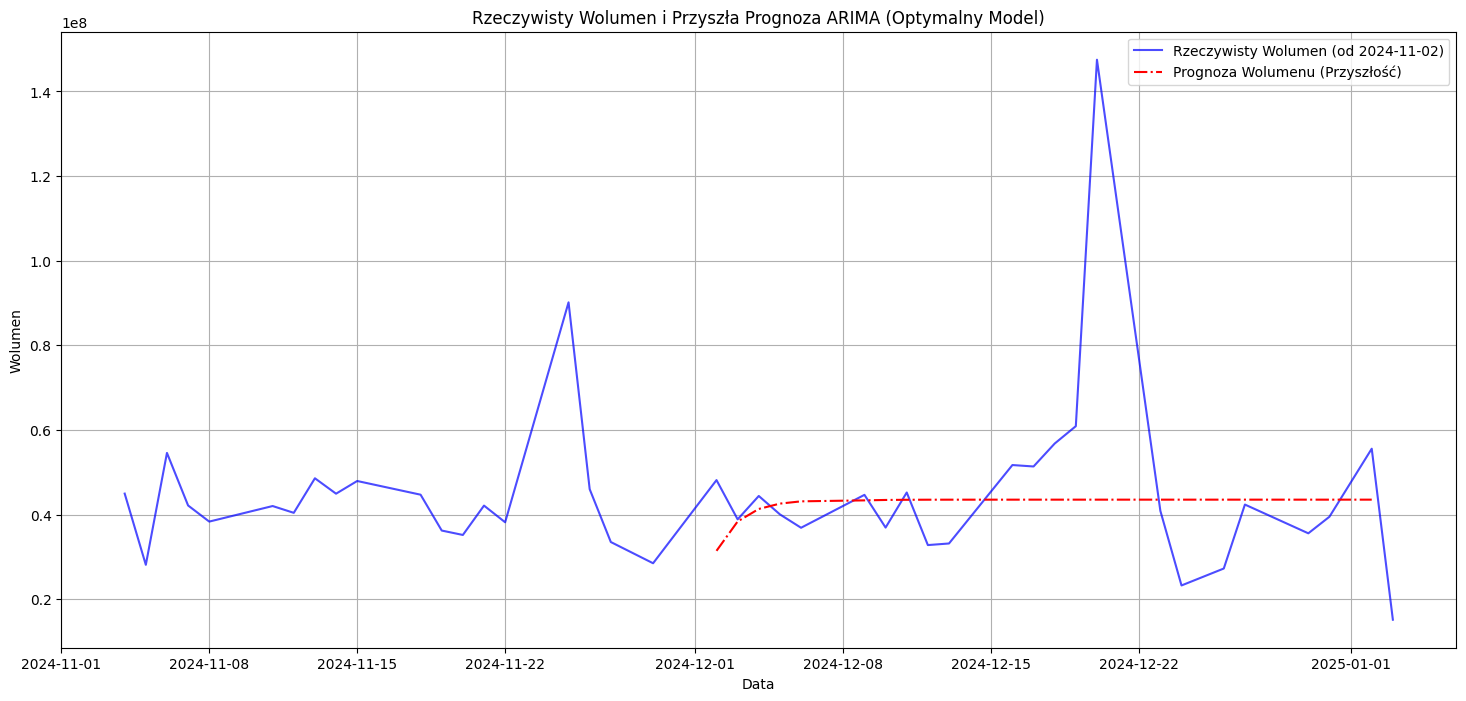